## Limpieza del set de datos de Properatti

In [86]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

Vamos a tomar la data

In [90]:
df = pd.read_csv("properatti.csv")

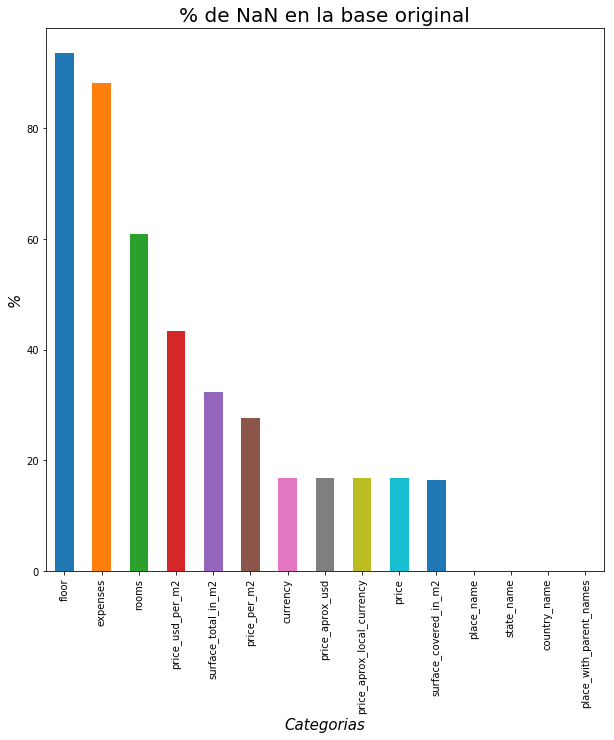

In [95]:
total = 121220
null_01 = np.round((df[["place_name","place_with_parent_names","country_name","state_name","price","currency","price_aprox_local_currency","price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2","price_per_m2","floor","rooms","expenses"]].isnull().sum() / total * 100).sort_values(ascending = False),2)
null_01


null_01.plot(kind = "bar", figsize = (10,10))
plt.title("% de NaN en la base original", size = 20)
plt.xlabel("Categorias",size = 15, style = "italic")
plt.ylabel("%", size = 15, style = "italic")
plt.show()

In [38]:
df.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 ambientes tipo casa planta baja por pasillo,...",2 amb tipo casa sin expensas en pb,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,venta de departamento en décimo piso al frente...,venta depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 ambientes 3er piso lateral living comedor am...,2 amb 3er piso con ascensor apto credito,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,ph 3 ambientes con patio. hay 3 deptos en lote...,ph 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,departamento con fantÁstica iluminaciÓn natura...,depto 2 amb al contrafrente zona centro/plaza ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


Vamos a samplear la data, para empezar la exploración y entender los datos:

In [48]:
df.sample(100)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
18148,18148,sell,house,Neuquén,|Argentina|Neuquén|Neuquén|,Argentina,Neuquén,3843123.0,NaN,NaN,...,140.0,334.692903,13214.285714,NaN,4.0,NaN,http://www.properati.com.ar/1756t_venta_casa_n...,"Venta de Casa 3 DORMITORIOS en Melipal, Neuqué...",CASA EN VENTA,https://thumbs4.properati.com/6/t0nyXYjDETxdbH...
14466,14466,sell,house,Haras del Pilar - Las Praderas 1 y 2,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Hara...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4126808157,-58.8411426544",-34.412681,...,480.0,1145.833333,1145.833333,NaN,NaN,NaN,http://www.properati.com.ar/16sad_venta_casa_h...,Excelente casa en dos plantas de 480 mts2 sobr...,Espectacular casa en Haras la Pradera,https://thumbs4.properati.com/7/PhjEDYs4N15knf...
60097,60097,sell,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9388041,-60.6604433",-32.938804,...,75.0,NaN,NaN,NaN,3.0,NaN,http://www.properati.com.ar/19yks_venta_depart...,Departamento en construcción de dos dormitorio...,"DEPARTAMENTO EN VENTA DE DOS DORMITORIO, ENTRE...",https://thumbs4.properati.com/8/jaQRaiNAUvZ4Qw...
47463,47463,sell,apartment,Palermo Hollywood,|Argentina|Capital Federal|Palermo|Palermo Hol...,Argentina,Capital Federal,NaN,"-34.581129,-58.4328702",-34.581129,...,27.0,2758.461538,3984.444444,NaN,1.0,NaN,http://www.properati.com.ar/198d7_venta_depart...,Con la impronta que le otorgan los canales de ...,Fitz Roy 2070,https://thumbs4.properati.com/9/tTE-kAEb41p5ji...
95497,95497,sell,apartment,Lomas de Zamora,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,Bs.As. G.B.A. Zona Sur,NaN,NaN,NaN,...,70.0,NaN,2571.428571,NaN,NaN,NaN,http://www.properati.com.ar/1bh8p_venta_depart...,"EN UN ESBELTO EDIFICIO DE FRENTE VIDRIADO, SE ...",Departamento - Lomas de Zamora Este,https://thumbs4.properati.com/7/-1VwkfCbAFlyIj...
49725,49725,sell,apartment,Morón,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|,Argentina,Bs.As. G.B.A. Zona Oeste,3430544.0,"-34.6538999,-58.6121429",-34.653900,...,NaN,20.898642,NaN,NaN,2.0,NaN,http://www.properati.com.ar/19cpo_venta_depart...,Venta de hermoso departamento 2 ambientes a es...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/8/tWaH_ze0pCpeTV...
68504,68504,sell,house,Adrogué,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,NaN,NaN,NaN,...,267.0,1086.142322,1086.142322,NaN,NaN,NaN,http://www.properati.com.ar/1agxz_venta_casa_a...,ES UN CHALET EN PH CONSTRUIDO SOBRE UN LOTE DE...,CHALET DE 3 DORMITORIOS,https://thumbs4.properati.com/9/53P2OjUryN61_c...
17246,17246,sell,house,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.971858,-60.6267",-32.971858,...,NaN,NaN,NaN,NaN,6.0,NaN,http://www.properati.com.ar/1719k_venta_casa_r...,Corredor Responsable: Jesica Tobio - CI Mat. N...,Venta Casa 3 dormitorios-Zona Sur- Apta Credito,https://thumbs4.properati.com/9/rmSHM7ty3JepQP...
19876,19876,sell,apartment,San Isidro,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro|,Argentina,Bs.As. G.B.A. Zona Norte,3428983.0,NaN,NaN,...,74.0,3581.081081,3581.081081,4.0,NaN,NaN,http://www.properati.com.ar/17b12_venta_depart...,San Isidro Central. Excelente complejo con muy...,"Departamento 74m² con Cochera, Bs.As. G.B.A. Z...",https://thumbs4.properati.com/7/wEXeUFPTSQFsvo...
58979,58979,sell,house,Floresta,|Argentina|Capital Federal|Floresta|,Argentina,Capital Federal,3433910.0,"-34.638258,-58.4750636",-34.638258,...,500.0,663.793103,770.000000,NaN,NaN,NaN,http://www.properati.com.ar/19wls_venta_casa_f...,CODIGO: 3205-DTC01 ubicado en: AV DIRECTORIO ...,EXCELENTE PROPIEDAD EN FLORESTA 5 AMBIENTES CO...,https://thumbs4.properati.com/9/--_RmpCF0me_u1...


### Vamos a borrar outliers: pisos mayores a 45 y operaciones en 'UYU' o 'PEN', asumimos que son ruido y los borramos

In [32]:
df.loc[df['floor']>=45,'floor'] = None
df.loc[df['currency']=='UYU','currency'] = None
df.loc[df['currency']=='PEN','currency'] = None

### Vamos a convertir el texto de las columnas 'title' y 'description' a minúsculas

In [61]:
df['title'] = df['title'].str.lower()
df['description'] = df['description'].str.lower()

### Vamos a entender un poco los campos de la información

Vamos a entender los campos de 'operation':

In [119]:
set(df['operation'])

{'sell'}

Vamos a entender los campos de 'property_type':

In [120]:
set(df['property_type'])

{'PH', 'apartment', 'house', 'store'}

Vamos a entender los campos de 'place_name':

In [121]:
df[["title","description"]]

,title,description
0,2 AMB TIPO CASA SIN EXPENSAS EN PB,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,..."
1,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,Venta de departamento en décimo piso al frente...
2,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...
3,PH 3 amb. cfte. reciclado,PH 3 ambientes con patio. Hay 3 deptos en lote...
4,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...
5,"Casa Barrio 338. Sobre calle 3 de caballería, ...","Casa en el perímetro del barrio 338, ubicada e..."
6,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...
7,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...
8,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...
9,WHITE 7637 - 2 DORMITORIOS CON PATIO,MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWH...


Vamos a ver la info del Data Frame

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 no

El campo rooms tiene 47390 entradas válidas. Vamos a ver si podemos completar

# Vamos a completar la información faltante en base a un diccionario

### Creo el diccionario del parser
Cada nueva fila debe tener formato: ['regEx para buscar', 'regEx para extraer números contenidos dentro del resultado de la regEx de búsqueda', 'columna donde buscar', 'columna donde guardar el dato faltante', 'tipo del dato a extraer']

In [93]:
col_names =  ['lookup_regex', 'extract_regex', 'column_to_lookup','column_to_complete','value_type','value_offset','extra_condition']
diccionario  = pd.DataFrame(columns = col_names)
#Nueva fila a agregar al diccionario. Va a tomar números entre 0 y 99 seguidos de entre 1 y 3 espacios, más amb o AMB o AMB.
#Va a revisar la columna 'title' y va a escribir los valores que encuentre en la columna 'rooms'
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}amb|\d{1,2} {1,3}AMB*|\d{1,2} {1,3}Amb*', '\d{1,2}', 'title', 'rooms', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#Nueva fila a agregar al diccionario. Va a tomar números entre 0 y 99 seguidos de entre 1 y 3 espacios, más amb o AMB o AMB.
#Va a revisar la columna 'description' y va a escribir los valores que encuentre en la columna 'rooms'
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}amb|\d{1,2} {1,3}AMB*|\d{1,2} {1,3}Amb*', '\d{1,2}', 'description', 'rooms', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #Nueva fila a agregar
#diccionario.loc[len(diccionario)] = ['/d abc', '/d', 'description', 'metros2', 'float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #Nueva fila a agregar
diccionario.loc[len(diccionario)] = ['monoamb|Monoamb|MONOAMB', '', 'description', 'rooms', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['monoamb|Monoamb|MONOAMB', '', 'title', 'rooms', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}piso|\d{1,2} {1,3}PISO*', '\d{1,2}', 'description', 'floor', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #Nueva fila a agregar
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}piso|\d{1,2} {1,3}PISO*', '\d{1,2}', 'title', 'floor', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #Nueva fila a agregar
diccionario.loc[len(diccionario)] = ['primer|PRIMER|Primer|1er', '', 'title', 'floor', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['primer|PRIMER|Primer|1er', '', 'description', 'floor', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#diccionario.loc[len(diccionario)] = ['decimo|DECIMO|Decimo|décimo', '', 'description', 'floor', 'float',10, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#diccionario.loc[len(diccionario)] = ['decimo|DECIMO|Decimo|décimo', '', 'title', 'floor', 'float',10, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#diccionario.loc[len(diccionario)] = ['segundo|SEGUNDO|Segundo|2do', '', 'title', 'floor', 'float',2, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#diccionario.loc[len(diccionario)] = ['segundo|SEGUNDO|Segundo|2do', '', 'description', 'floor', 'float',2, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#diccionario.loc[len(diccionario)] = ['tercer|TERCER|Tercer|3er', '', 'description', 'floor', 'float',3, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #CHEQUEAR. HAY UN EJEMPLO QUE CUANDO DICE TERCER ENCUENTRA UNA OBSERVACION QUE LITERALMENTE DICE TERCERA EDAD. QUE HACE EL CODIGO EN ESTE CASO?
#diccionario.loc[len(diccionario)] = ['tercer|TERCER|Tercer|3er', '', 'title', 'floor', 'float',3, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#diccionario.loc[len(diccionario)] = ['cuarto|CUARTO|Cuarto|4to', '', 'title', 'floor', 'float',4, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#diccionario.loc[len(diccionario)] = ['cuarto|CUARTO|Cuarto|4to', '', 'description', 'floor', 'float',4, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #mismo caso. Puede llegar a traer una observacion que dice 4 cuartoSS ????
#diccionario.loc[len(diccionario)] = ['quianto|QUINTO|Quinto|5to', '', 'title', 'floor', 'float',5, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#diccionario.loc[len(diccionario)] = ['quinto|QUINTO|Quinto|5to', '', 'description', 'floor', 'float',5, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#diccionario.loc[len(diccionario)] = ['sexto|SEXTO|Sexto|6to', '', 'description', 'floor', 'float',6, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#diccionario.loc[len(diccionario)] = ['sexto|SEXTO|Sexto|6to', '', 'title', 'floor', 'float',6, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['septimo p|SEPTIMO P|Septimo p|7mo', '', 'title', 'floor', 'float',7, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['septimo p|SEPTIMO P|Septimo p|7mo', '', 'description', 'floor', 'float',7, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#diccionario.loc[len(diccionario)] = ['octavo|OCTAVO|Octavo|8vo', '', 'description', 'floor', 'float',8, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#diccionario.loc[len(diccionario)] = ['octavo|OCTAVO|Octavo|8vo', '', 'title', 'floor', 'float',8, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#diccionario.loc[len(diccionario)] = ['noveno|NOVENO|Noveno|9no', '', 'title', 'floor', 'float',9, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#diccionario.loc[len(diccionario)] = ['noveno|NOVENO|Noveno|9no', '', 'description', 'floor', 'float',9, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['piso \d{1,2}|Piso \d{1,2}|PISO \d{1,2}', '\d{1,2}', 'title', 'floor', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['piso \d{1,2}|Piso \d{1,2}|PISO \d{1,2}', '\d{1,2}', 'description', 'floor', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}amb|\d{1,2} {1,3}AMB*|\d{1,2} {1,3}Amb*', '\d{1,2}', 'title', 'rooms', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}Hab|\d{1,2} {1,3}HAB*|\d{1,2} {1,3}Hab*|\d{1,2} {1,3}dorm*', '\d{1,2}', 'title', 'rooms', 'float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}amb|\d{1,2} {1,3}AMB*|\d{1,2} {1,3}Amb*','\d{1,2}','description', 'rooms', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #Nueva fila a agregar
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}hab|\d{1,2} {1,3}HAB*|\d{1,2} {1,3}Hab*|\d{1,2} {1,3}dorm*','\d{1,2}', 'description','rooms', 'float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,7} {0,3}USD|\d{1,7} {0,3}dolar*|\d{1,7} {0,3}dólar*','\d{1,7}','title','price_aprox_usd','float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,7} {0,3}USD|\d{1,7} {0,3}dolar*','\d{1,7}','description','price_aprox_usd','float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,8} {0,3}peso*|\d{1,8} {0,3}Peso*|\d{1,8} {0,3}ARS','\d{1,8}','title', 'price_aprox_local_currency','float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,8} {1,3}peso*|\d{1,8} {1,3}Peso*|\d{1,8} {0,3}ARS','\d{1,8}','description', 'price_aprox_local_currency','float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['Sup {0,3}\d{1,3} {0,3}Mts|SUP {0,3}\d{1,4} {0,3}MTS|sup {0,3}\d{1,4} {0,3}mts', '\d{1,4}', 'title', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['Sup {0,3}\d{1,3} {0,3}Mts|SUP {0,3}\d{1,4} {0,3}MTS|sup {0,3}\d{1,4} {0,3}mts', '\d{1,4}', 'description', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}MTS2|\d{1,4} {0,3}Mts2 |\d{1,4} {0,3}mts2', '\d{1,4}', 'title', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}MTS2|\d{1,4} {0,3}Mts2 |\d{1,4} {0,3}mts2', '\d{1,4}', 'description', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}Ms|\d{1,4} {0,3}MS |\d{1,4} {0,3}ms', '\d{1,4}', 'title', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}Ms|\d{1,4} {0,3}MS |\d{1,4} {0,3}ms', '\d{1,4}', 'description', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}M|\d{1,4} {0,3}m', '\d{1,4}', 'title', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}M|\d{1,4} {0,3}m', '\d{1,4}', 'description', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]

Veo el diccionario:

In [63]:
diccionario

,lookup_regex,extract_regex,column_to_lookup,column_to_complete,value_type,value_offset,extra_condition
0,"\d{1,2} {1,3}amb|\d{1,2} {1,3}AMB*|\d{1,2} {1,...","\d{1,2}",title,rooms,float,0,{u'condition_func': <function <lambda> at 0x00...
1,"\d{1,2} {1,3}amb|\d{1,2} {1,3}AMB*|\d{1,2} {1,...","\d{1,2}",description,rooms,float,0,{u'condition_func': <function <lambda> at 0x00...
2,monoamb|Monoamb|MONOAMB,,description,rooms,float,1,{u'condition_func': <function <lambda> at 0x00...
3,monoamb|Monoamb|MONOAMB,,title,rooms,float,1,{u'condition_func': <function <lambda> at 0x00...
4,"\d{1,2} {1,3}piso|\d{1,2} {1,3}PISO*","\d{1,2}",description,floor,float,0,{u'condition_func': <function <lambda> at 0x00...
5,"\d{1,2} {1,3}piso|\d{1,2} {1,3}PISO*","\d{1,2}",title,floor,float,0,{u'condition_func': <function <lambda> at 0x00...
6,primer|PRIMER|Primer|1er,,title,floor,float,1,{u'condition_func': <function <lambda> at 0x00...
7,primer|PRIMER|Primer|1er,,description,floor,float,1,{u'condition_func': <function <lambda> at 0x00...
8,septimo p|SEPTIMO P|Septimo p|7mo,,title,floor,float,7,{u'condition_func': <function <lambda> at 0x00...
9,septimo p|SEPTIMO P|Septimo p|7mo,,description,floor,float,7,{u'condition_func': <function <lambda> at 0x00...


Defino la función que procesa el dataframe iterando en base al diccionaro:

In [94]:
def df_parser(data,parse_dictionary):
    for pattern_row_index, pattern in parse_dictionary.iterrows():
        #print ("Looking for regular expression: '" + pattern["lookup_re"] + "' in column: '" + pattern["column_to_lookup"] + "', extracting number with regEx: '" + pattern["extract_re"]+"' and assigning value to column: '" + pattern["column_to_complete"] + "'")
        #print(pattern['extra_condition'])
        for data_row_index, row in data[ (data[pattern["column_to_complete"]].isnull() == True) &
                                         (pattern['extra_condition']['condition_func'] (data[pattern['extra_condition']['data_column']],pattern['extra_condition']['value']) == True) ].iterrows():
                                         #(1==1) ].iterrows():
        #for data_row_index, row in data.iterrows():
            #print(data.loc[data_row_index,pattern["column_to_complete"]])
            if type(data.loc[data_row_index,pattern["column_to_lookup"]]) is str and data.loc[data_row_index,pattern["column_to_lookup"]] != '':
                #print('Missing data here ...')
                matches = re.search(pattern["lookup_regex"], data.loc[data_row_index,pattern["column_to_lookup"]])
                if matches:
                    #print('Encontró: ')
                    #print(matches.group(0)) #Imprime el valor encontrado dentro del campo que se está interpretando
                    #print('En: ')
                    #print(data.loc[data_row_index,pattern["column_to_lookup"]])
                    #print(data.loc[data_row_index,pattern["column_to_complete"]]) #Imprime el valor encontrado del campo que se está intentando llenar
                    #print(re.search(pattern["extract_regex"], matches.group(0)).group(0)) #Imprime el string que va a ser extraído para convertir a número
                    if (pattern["value_type"] == 'float') and (pattern["extract_regex"] != ''):
                        number = float( re.search(pattern["extract_regex"], matches.group(0)).group(0) ) + pattern["value_offset"]
                    elif (pattern["value_type"] == 'int') and (pattern["extract_regex"] != ''):
                        number = int( re.search(pattern["extract_regex"], matches.group(0)).group(0) ) + pattern["value_offset"]
                    elif pattern["value_type"] == 'float':
                        number = float(pattern["value_offset"])
                    else:
                        number = int(pattern["value_offset"])
                    data.loc[data_row_index,pattern["column_to_complete"]] = number
                    #print('Escribió: ')
                    #print(number)
                    #print(data.loc[data_row_index,pattern["column_to_complete"]])
    return

### Corro la función para parsear la información

In [96]:
df_parser(df,diccionario)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100840 non-null float64
price_aprox_usd               100825 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 no

El campo rooms antes tenía 47390 entradas válidas. Ahora vemos que tiene 93450 entradas válidas

In [100]:
#Esta funcion se puede usar para ir viendo que palabras clave estan contenidas en el titulo/descripción
df[df["title"].str.contains("primer","segundo")]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
1242,1242,sell,apartment,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4465229,-58.6338743",-34.446523,...,108.0,2349.921250,52763.305556,1.0,5.0,NaN,http://www.properati.com.ar/15hp2_venta_depart...,Emprendimiento de la mano de Constantini dentr...,LOS CASTAÑOS | Las Piedras - Unidad 1205 - Dup...,https://thumbs4.properati.com/7/2oB5cJHFldk9Gt...
1243,1243,sell,apartment,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4465229,-58.6338743",-34.446523,...,108.0,2349.921250,52763.305556,1.0,5.0,NaN,http://www.properati.com.ar/15hp4_venta_depart...,Emprendimiento de la mano de Constantini dentr...,LOS CASTAÑOS | Las Piedras - Unidad 1205 - Dup...,https://thumbs4.properati.com/7/9GXsOtl_iAEdpV...
1313,1313,sell,apartment,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.40014,-58.64985",-34.400140,...,55.0,2307.692308,2727.272727,1.0,2.0,NaN,http://www.properati.com.ar/15hu2_venta_depart...,"Antares Senior Living tiene un diseño moderno,...",EL PORTAL | Antares | Departamento en venta co...,https://thumbs4.properati.com/8/W-Bvzy_OoSv4_5...
1315,1315,sell,apartment,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.40014,-58.64985",-34.400140,...,55.0,2307.692308,2727.272727,1.0,2.0,NaN,http://www.properati.com.ar/15hu4_venta_depart...,"Antares Senior Living tiene un diseño moderno,...",EL PORTAL | Antares | Departamento en venta co...,https://thumbs4.properati.com/8/trC9bc9WE7MPBO...
11810,11810,sell,PH,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-37.9931664,-57.565954",-37.993166,...,NaN,NaN,NaN,1.0,3.0,NaN,http://www.properati.com.ar/16d34_venta_ph_mar...,"Living-comedor 8,40 x 4,95 con balcón corrido....",PH primer piso por escalera,https://thumbs4.properati.com/2/3X6oUvkmjLkYU7...
14192,14192,sell,PH,Villa Libertad,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,Argentina,Bs.As. G.B.A. Zona Norte,3427411.0,"-34.5848176514,-58.5626222198",-34.584818,...,110.0,654.761905,1000.000000,1.0,3.0,NaN,http://www.properati.com.ar/16rbw_venta_ph_gen...,"PH de 3 ambientes en primer piso, con balcon t...",PH 3 ambientes amplio en primer piso con balco...,https://thumbs4.properati.com/1/i8VIvYBD4h14KK...
19288,19288,sell,PH,Quilmes,|Argentina|Bs.As. G.B.A. Zona Sur|Quilmes|,Argentina,Bs.As. G.B.A. Zona Sur,3429651.0,"-34.7366229037,-58.2535895983",-34.736623,...,170.0,386.010363,876.470588,1.0,NaN,NaN,http://www.properati.com.ar/179el_venta_ph_qui...,CODIGO: ubicado en: Beruti - Publicado por: ...,PH en primer piso con garage y 4 dormitorios -...,https://thumbs4.properati.com/1/DRdE0C6NtFdLz4...
19808,19808,sell,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9543925,-60.6502973",-32.954392,...,23.0,NaN,2608.695652,1.0,1.0,NaN,http://www.properati.com.ar/17art_venta_depart...,CODIGO: 2062-630 ubicado en: ITALIA Y MONTEVID...,VENTA MONOAMBIENTE A ESTRENAR . ZONA CENTRO DE...,https://thumbs4.properati.com/6/R0aFADejbxcuD9...
19809,19809,sell,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9543925,-60.6502973",-32.954392,...,39.0,NaN,2551.282051,1.0,NaN,NaN,http://www.properati.com.ar/17aru_venta_depart...,CODIGO: 2062-631 ubicado en: ITALIA Y MONTEVID...,"VENTA DEPTO 1 DORMITORIO. Cocina , amplio es...",https://thumbs4.properati.com/4/q9zqOnhbcbH0pj...
20068,20068,sell,house,Quilmes,|Argentina|Bs.As. G.B.A. Zona Sur|Quilmes|Quil...,Argentina,Bs.As. G.B.A. Zona Sur,3429651.0,"-34.7160249,-58.2746724",-34.716025,...,207.0,1014.492754,1014.492754,1.0,2.0,NaN

### Finalmente, vamos a calcular los valores u$d/m2 en donde falten:

Los que pusieron dólares, van a recibir dólares

In [80]:
df.loc[ df['price_usd_per_m2'].isnull() == True,'price_usd_per_m2'] = df.loc[ df['price_usd_per_m2'].isnull() == True,'price_aprox_local_currency']/df.loc[ df['price_usd_per_m2'].isnull() == True,'surface_covered_in_m2']

In [67]:
df.loc[ df['price_per_m2'].isnull() == True,'price_per_m2'] = df.loc[ df['price_per_m2'].isnull() == True,'price_aprox_local_currency']/df.loc[ df['price_per_m2'].isnull() == True,'surface_covered_in_m2']

Los que pusieron pesos, van a recibir pesos

### Vamos a interpretar nuevamente la información con gráficos

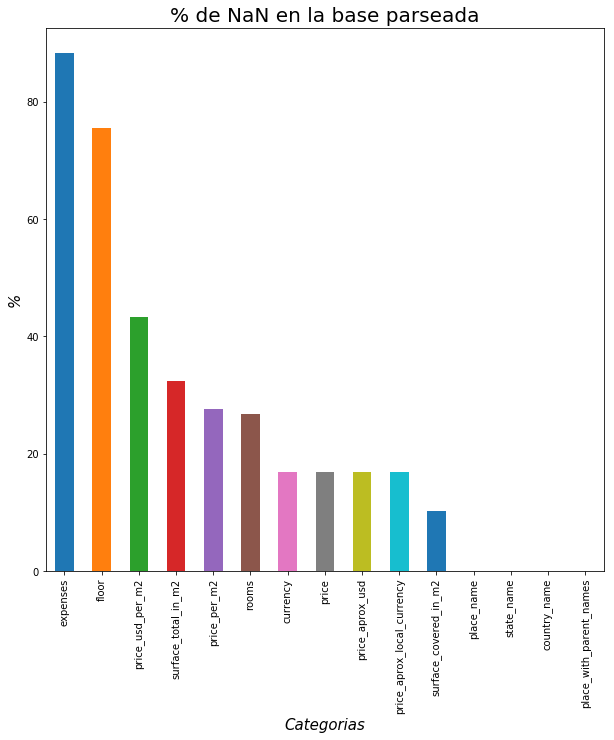

In [102]:
total = 121220
null_01 = np.round((df[["place_name","place_with_parent_names","country_name","state_name","price","currency","price_aprox_local_currency","price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2","price_per_m2","floor","rooms","expenses"]].isnull().sum() / total * 100).sort_values(ascending = False),2)
#null_01
null_01.plot(kind = "bar", figsize = (10,10))
plt.title("% de NaN en la base parseada", size = 20)
plt.xlabel("Categorias",size = 15, style = "italic")
plt.ylabel("%", size = 15, style = "italic")
plt.show()